In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import filter_valid
from pyolin.gate import Gate

import matplotlib.pyplot as plt
import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv').rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(raw)

/home/lewis/my/sauce/pyolin/pyolin/gate.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)
/home/lewis/my/sauce/pyolin/pyolin/gate.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)
/home/lewis/my/sauce/pyolin/pyolin/gate.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)
/home/lewis/my/sauce/pyolin/pyolin/gate.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)
/home/lewis/my/sauce/pyolin/pyolin/gate.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)
/home/lewis/my/sauce/pyolin/pyolin/gate.py:51: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) /

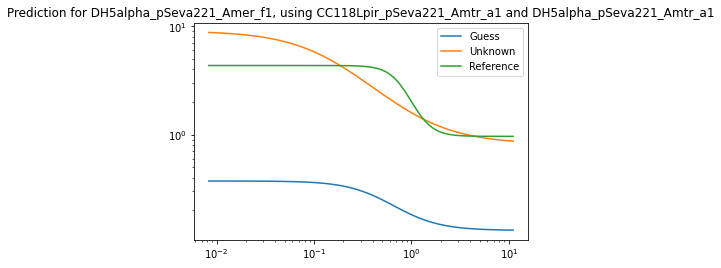

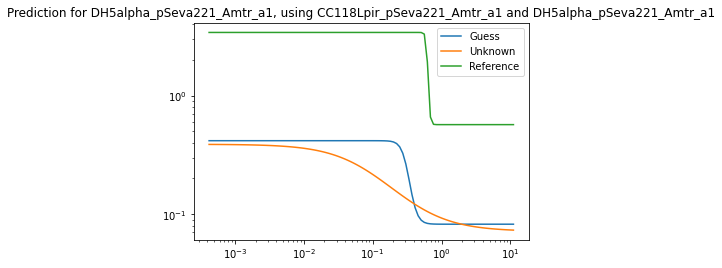

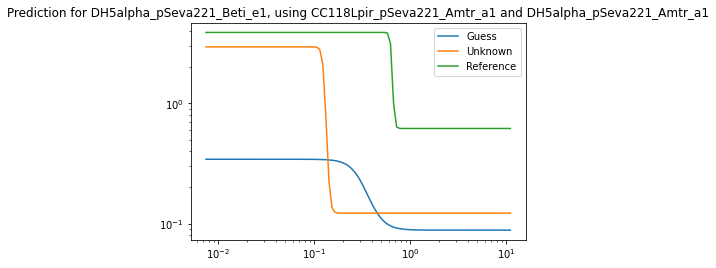

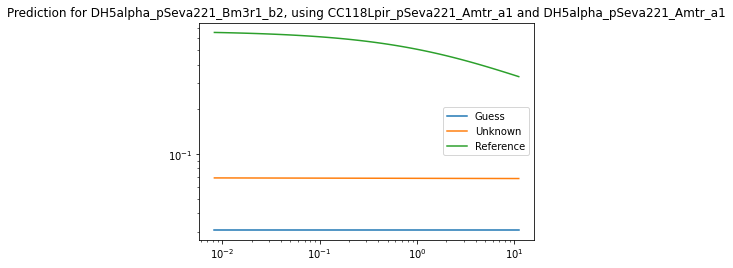

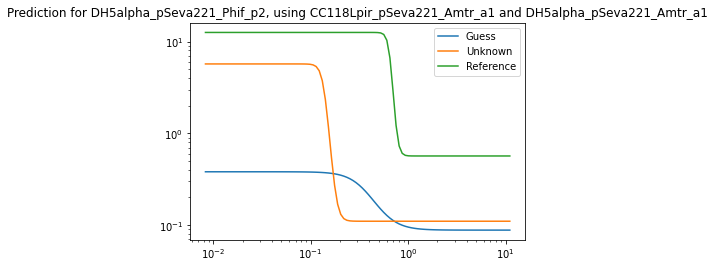

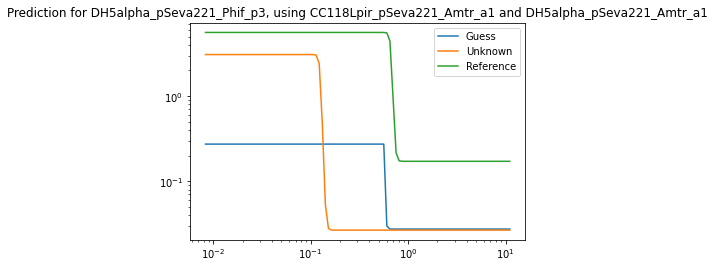

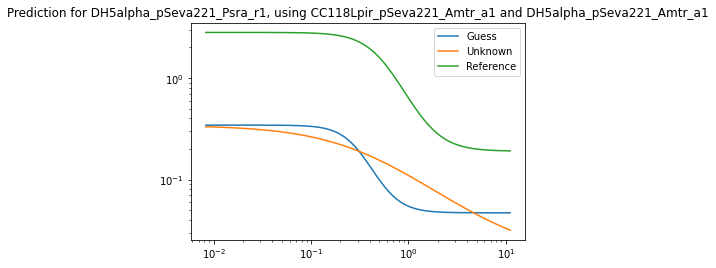

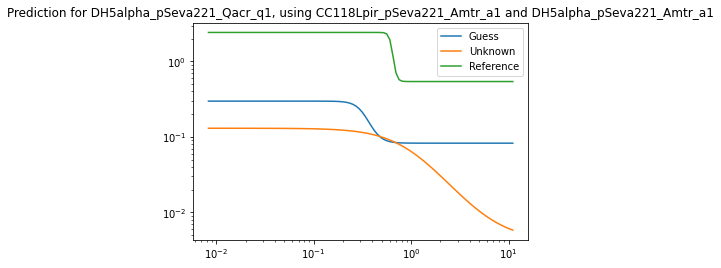

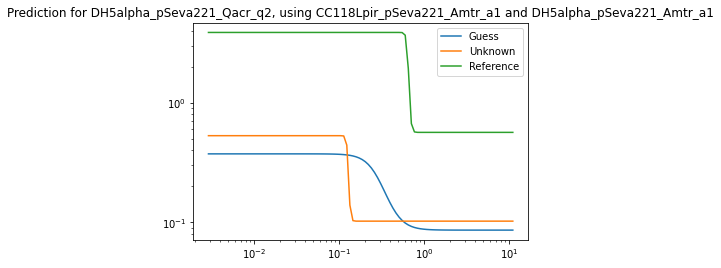

In [7]:
from pyolin.linear_transform import linear_transform_prediction

import matplotlib.pyplot as plt

import numpy
from numpy import log

def remove_negative(numpy_array):
    filtered = [row for row in numpy_array if row[0] > 0.0 and row[1] > 0.0]
    return numpy.vstack(tuple(filtered))

hostA = 'CC118Lpir'
hostB = 'DH5alpha'
backA = 'pSeva221'
backB = 'pSeva221'
refcargo = 'Amtr_a1'
A = data[hostA:backA:refcargo]
B = data[hostB:backB:refcargo]

for ref in data[hostA:backA:]:
    if ref.has_valid_thresholds:
        unknown = data[hostB:backB:ref.cargo]
        if unknown and unknown.has_valid_thresholds:
            guess_points, solution = linear_transform_prediction(A, B, ref)
            guess_points = remove_negative(guess_points)
            guess = Gate(f"{ref.name}_guess", [], guess_points[:, 0], guess_points[:, 1])
        
            try:
                min_input = log(min(numpy.hstack((A.rpu_in, B.rpu_in, guess.rpu_in))))
                max_input = log(max(numpy.hstack((A.rpu_in, B.rpu_in, guess.rpu_in))))
                smooth_xs = numpy.logspace(min_input, max_input, 100)
        
                fig, axes = plt.subplots()
                axes.plot(smooth_xs, list(map(guess.hill_function, smooth_xs)), label="Guess")
                axes.plot(smooth_xs, list(map(unknown.hill_function, smooth_xs)), label="Unknown")
                axes.plot(smooth_xs, list(map(ref.hill_function, smooth_xs)), label="Reference")
                axes.set_yscale('log')
                axes.set_xscale('log')
                axes.set_title(f"Prediction for {unknown.name}, using {A.name} and {B.name}")
                axes.legend()
            except ValueError:
                print(f"A ValueError was raised for: {guess}")

In [6]:
from pyolin.linear_transform import optim_matrix

for A in data[hostA:backA:]:
    B = data[hostB:backB:A.cargo]

    if B:
        try:
            valid = A.has_valid_thresholds and B.has_valid_thresholds
            if valid:
                print(f"{A.cargo} :: {optim_matrix(A, B).fun}")
        except RuntimeError:
            print(f"{A} and {B}")


Amer_f1 :: 4.545101014296939
Amtr_a1 :: 1.50501193092378
Beti_e1 :: 1.8083396153804954
CC118Lpir_pSeva221_Bm3r1_b2 and DH5alpha_pSeva221_Bm3r1_b2
Phif_p2 :: 1.5960665921909452
Phif_p3 :: 2.374993183197582
CC118Lpir_pSeva221_Psra_r1 and DH5alpha_pSeva221_Psra_r1
Qacr_q1 :: 1.4930600865768446
Qacr_q2 :: 1.4471059577049974
